In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
import matplotlib.image as mpimg

In [2]:
# 여러 이미지 파일 경로를 포함한 리스트
image_paths = [
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Emphysema\00001248_021.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\PREPROCESSING\sample\00001754_000.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\PREPROCESSING\sample\00028774_025.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\PREPROCESSING\sample\CHNCXR_0001_0.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\PREPROCESSING\sample\CHNCXR_0171_0.png",

r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-12.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-13.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-14.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-15.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-16.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-18.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-19.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-20.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-21.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-22.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-23.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-24.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-25.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-26.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Tuberculosis\Tuberculosis-27.png",

r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00000583_045.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00001247_011.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00001529_002.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00001749_003.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00002288_004.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00002360_002.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00003510_010.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00003528_043.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00004893_027.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00006759_001.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00006832_001.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00008727_009.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00009863_059.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00010334_010.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Pneumonia\00010375_000.png",

r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000030_001.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000091_008.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000143_009.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000149_002.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000175_002.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000248_009.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000248_010.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000307_000.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000314_000.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000348_007.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000368_002.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000381_003.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000468_033.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000583_033.png",
r"C:\Users\Sese\machinelearning\Lung_Image_AI\data\rapid-cxr-dataset\lung_diseases\Atelectasis\00000583_035.png"

]

In [15]:
import ipywidgets as widgets
from ipycanvas import Canvas, hold_canvas
from IPython.display import display
from PIL import Image
import numpy as np
import cv2

def create_interactive_mask(image_path):
    # 이미지 로드 및 크기 조정
    img = Image.open(image_path)
    max_size = (400, 400)
    img.thumbnail(max_size)
    img_array = np.array(img)
    
    # 캔버스 크기 설정 (이미지 크기에 맞춤)
    canvas_size = img.size
    
    # 캔버스 생성
    canvas = Canvas(width=canvas_size[0], height=canvas_size[1])
    canvas.put_image_data(img_array, 0, 0)
    
    # 마스크 배열 초기화 (2D, 흑백)
    mask_array = np.zeros((canvas_size[1], canvas_size[0]), dtype=np.uint8)
    
    # 그리기 상태 변수
    drawing = False
    last_x = last_y = None
    is_eraser_mode = False
    
    def start_drawing(x, y):
        nonlocal drawing, last_x, last_y
        drawing = True
        last_x, last_y = int(x), int(y)
    
    def stop_drawing(x, y):
        nonlocal drawing, last_x, last_y
        drawing = False
        last_x = last_y = None
    
    def draw(x, y):
        nonlocal last_x, last_y, mask_array
        if drawing:
            x, y = int(x), int(y)
            if last_x is not None and last_y is not None:
                # 선 그리기 또는 지우기
                color = 0 if is_eraser_mode else 255
                cv2.line(mask_array, (last_x, last_y), (x, y), color, 2)
                
                # 캔버스에 마스크 표시
                with hold_canvas(canvas):
                    canvas.clear()
                    canvas.put_image_data(img_array, 0, 0)
                    # 마스크를 반투명한 흰색으로 표시
                    color_mask = np.zeros((canvas_size[1], canvas_size[0], 4), dtype=np.uint8)
                    color_mask[mask_array > 0] = [255, 255, 255, 128]
                    canvas.put_image_data(color_mask, 0, 0)
            
            last_x, last_y = x, y
    
    # 이벤트 핸들러 등록
    canvas.on_mouse_down(start_drawing)
    canvas.on_mouse_up(stop_drawing)
    canvas.on_mouse_move(draw)
    
    # 모드 전환 버튼
    mode_button = widgets.ToggleButton(description="Eraser Mode", layout=widgets.Layout(width='auto'))
    
    def toggle_mode(change):
        nonlocal is_eraser_mode
        is_eraser_mode = change['new']
        if is_eraser_mode:
            canvas.cursor = "crosshair"
        else:
            canvas.cursor = "default"
    
    mode_button.observe(toggle_mode, names='value')
    
    # 저장 버튼
    save_button = widgets.Button(description="Save", layout=widgets.Layout(width='auto'))
    output = widgets.Output()
    
    def save_mask(b):
        with output:
            print("Mask saved.")
            print("Mask shape:", mask_array.shape)
            print("Mask data type:", mask_array.dtype)
            print("Mask min value:", mask_array.min())
            print("Mask max value:", mask_array.max())
        return mask_array
    
    save_button.on_click(save_mask)
    
    # UI 레이아웃 조정
    controls = widgets.HBox([mode_button, save_button], 
                            layout=widgets.Layout(width='auto', justify_content='space-between'))
    
    # UI 표시
    display(widgets.VBox([canvas, controls, output], 
                         layout=widgets.Layout(width=f'{canvas_size[0]}px', align_items='center')))
    
    return save_mask

# 사용 예:
mask_creator = create_interactive_mask(image_paths[0])


In [16]:
mask1 = mask_creator(None)

(400, 400)


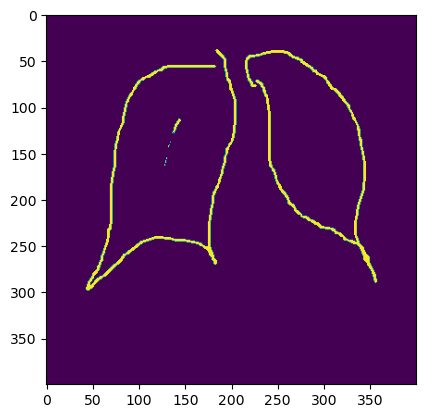

In [17]:
print(mask1.shape)
plt.imshow(mask1)